In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [3]:
df=pd.read_csv('/content/amazon_vfl_reviews.csv')
df

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


In [11]:
df[["gender"]] = np.random.randint(2, size=(2782,1))
df

,asin,name,date,rating,review,gender
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,0
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,1
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,0
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,0
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,1
...,...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.,0
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap,0
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा,0
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product,1


In [27]:
df.groupby('gender').mean()

,rating
gender,
0,3.764915
1,3.766376


Null hypothesis: men give more 5 star rating than women 

Alternative hypothesis:women give more 5 star than men

In [14]:
dif = df[['rating', 'gender']]
dif

,rating,gender
0,1,0
1,5,1
2,1,0
3,1,0
4,5,1
...,...,...
2777,5,0
2778,5,0
2779,2,0
2780,4,1


In [30]:
male = dif['rating'] [dif['gender'] == 0]
male


0       1
2       1
3       1
5       4
9       5
       ..
2775    5
2776    5
2777    5
2778    5
2779    2
Name: rating, Length: 1408, dtype: int64

In [31]:
female = dif['rating'] [dif['gender'] == 1]
female

1       5
4       5
6       1
7       5
8       3
       ..
2769    5
2770    5
2773    5
2780    4
2781    5
Name: rating, Length: 1374, dtype: int64

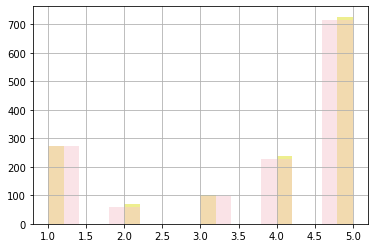

In [51]:

male.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("yellow", .75), bins=20)
female.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("pink", .75), bins=10)
plt.show()

In [38]:
means_table = dif.groupby('gender').mean()
means_table

,rating
gender,
0,3.764915
1,3.766376


In [40]:
observed_difference = means_table['rating'][1] - means_table['rating'][0]
observed_difference 

0.001460773124255521

In [41]:
shuffled = dif.sample(2782)
shuffled

,rating,gender
741,5,1
2061,5,1
2536,5,1
1392,5,1
2531,3,1
...,...,...
834,4,1
2707,1,1
2551,5,0
1746,1,0


In [42]:
shuffled_ratings = shuffled['rating']

In [47]:
original_and_shuffled= dif.assign(shuffled_ratings=shuffled_ratings.values )
original_and_shuffled

,rating,gender,shuffled_ratings
0,1,0,5
1,5,1,5
2,1,0,5
3,1,0,5
4,5,1,3
...,...,...,...
2777,5,0,4
2778,5,0,1
2779,2,0,5
2780,4,1,1


In [48]:
all_group_means= original_and_shuffled.groupby('gender').mean()
all_group_means

,rating,shuffled_ratings
gender,,
0,3.764915,3.750710
1,3.766376,3.780932


In [50]:
difference = all_group_means['shuffled_ratings'][1]- all_group_means['shuffled_ratings'][0]
difference

0.03022135933571546

from differnce we can say that Null hypothesis cannot be rejected , so male give more 5 star than female 